In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("train.csv")

In [30]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [31]:
data.shape

(9800, 18)

In [32]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [33]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [34]:
# Remove the columns that won't be useful for our work. 

df = data.drop(["Row ID", "Order ID", "Customer ID", "Product ID"], axis=1 )


In [35]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [36]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [37]:
df[df["Postal Code"].isnull()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [38]:
df["Postal Code"]=df["Postal Code"].fillna(5402)

In [39]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [40]:
df[df["City"]=="Burlington"]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
683,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,26/12/2018,01/01/2019,Standard Class,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Newell 336,23.968
1039,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Staples in misc. colors,28.728
1393,03/07/2018,04/07/2018,First Class,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,19/10/2018,26/10/2018,Standard Class,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [41]:
# Sales by months
df["Month"] = df["Order Date"].str[3:5].astype("int32")
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,5
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,1
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,1
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,1


In [42]:
print(df["Month"].isna().sum())

0


In [43]:
# Convert months to names, we are using dictionary
months = {1:"january", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}


In [44]:
months[5]

'May'

In [45]:
df["Month"] = [months[i] for i in df["Month"]]
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,january
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,january
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,january


In [46]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)


In [47]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,january
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,january
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,january


In [48]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

In [49]:
df["Year"] = df["Order Date"].dt.year
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May,2017
9796,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,january,2016
9797,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,january,2016
9798,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,january,2016


In [50]:
df["Year"].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [53]:
months_df = df.groupby("Month")["Sales"].sum()
months_df

Month
April        136283.0006
August       157315.9270
December     321480.1695
February      59371.1154
July         145535.6890
June         145837.5233
March        197573.5872
May          154086.7237
November     350161.7110
October      199496.2947
September    300103.4117
january       94291.6296
Name: Sales, dtype: float64

In [63]:
months_df = months_df.reset_index()
months_df.columns = ["Month", "Sales"]  # Yeni sütun isimleri belirle


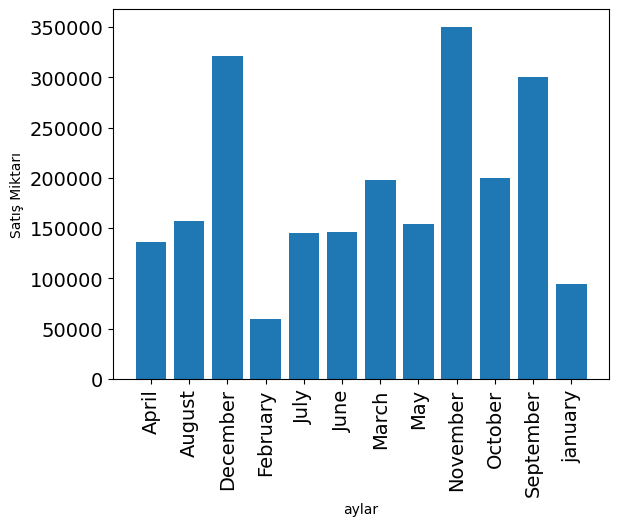

In [76]:
# Sales quantities by month
plt.bar(months_df["Month"], months_df["Sales"])
plt.xlabel("aylar")
plt.ylabel("Satış Miktarı")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [77]:
years_df = df.groupby("Year")["Sales"].sum()
years_df

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

In [78]:
years_df = years_df.reset_index()
years_df.columns = ["Year", "Sales"]  # Yeni sütun isimleri belirle


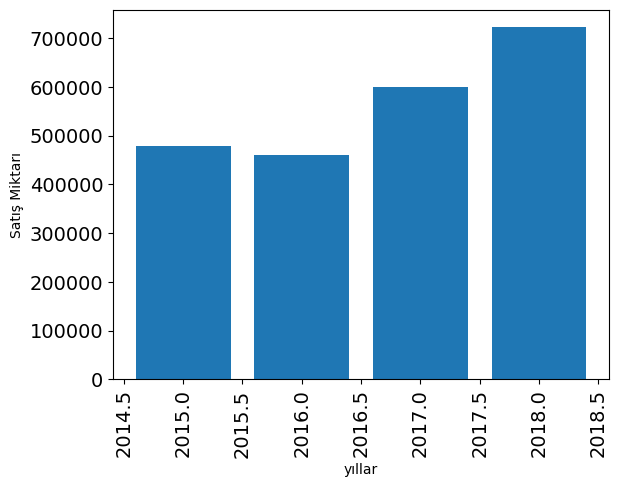

In [79]:
# Sales quantities by year
plt.bar(years_df["Year"], years_df["Sales"])
plt.xlabel("yıllar")
plt.ylabel("Satış Miktarı")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [91]:
customer = df.groupby("Customer Name").sum(numeric_only=True).sort_values("Sales", ascending = False)
customer.drop(["Postal Code", "Year"], axis=1, inplace = True)
customer.reset_index(inplace=True)
customer = customer.head(20)

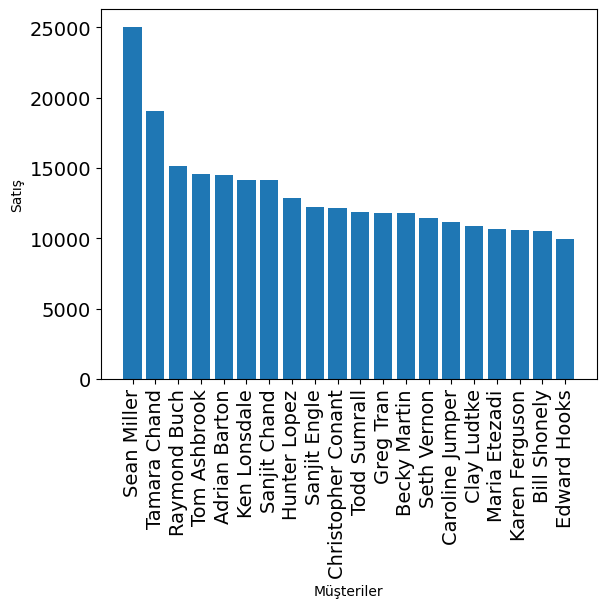

In [93]:
# Spending data of the first 20 customers.
plt.bar(customer["Customer Name"], customer["Sales"])
plt.xlabel("Müşteriler")
plt.ylabel("Satış")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [97]:
# Sales quantities by category
category = df.groupby("Category").sum(numeric_only=True)
category.drop(["Postal Code", "Year"], axis=1, inplace = True)
category.reset_index(inplace=True)
category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


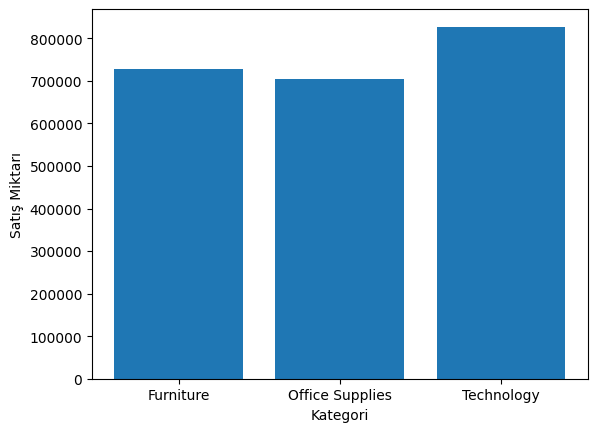

In [98]:
plt.bar(category["Category"], category["Sales"])
plt.xlabel("Kategori")
plt.ylabel("Satış Miktarı")
plt.show()

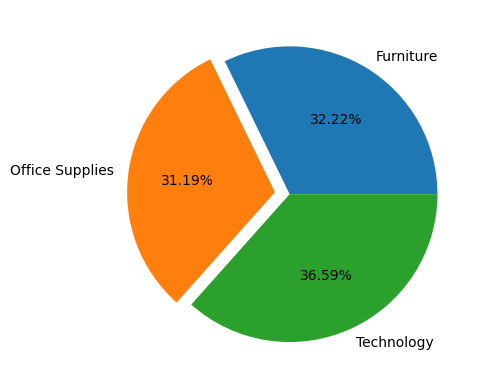

In [101]:
plt.pie(category["Sales"], labels = category["Category"], autopct = "%0.2f%%", explode = [0,0.1,0])
plt.show()